## Read from Da-TACOS feature-fused SSMs and compute shape DNA and hierarchical structure decomposition

### Library importing

In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp2d
from scipy.sparse.csgraph import laplacian
from scipy.spatial.distance import directed_hausdorff
from scipy.cluster import hierarchy
from scipy.linalg import eigh
from scipy.ndimage import median_filter
import cv2
from seaborn import clustermap
import sklearn
import librosa
import glob
import os
import random
import json
import deepdish as dd
import matplotlib.pyplot as plt
import dill
%matplotlib inline

In [ ]:
dill.dumb_session('shapeset.db')

In [ ]:
dill.load('shapeset.db')

### Reading and computing structure

In [2]:
with open('./da-tacos_metadata/da-tacos_benchmark_subset_metadata.json') as f:
    benchmark_metadata = json.load(f)

count=0
#dict = {} #everything stored here keeping W,P hierarchy, as [shapeDNA, dist_set]
all_shapeDNA = []
all_distset = []
all_WP = []
y = []
for W in benchmark_metadata.keys():
    #W_dict = {}
    if len(benchmark_metadata[W].keys()) > 4:
        for P in benchmark_metadata[W].keys():
            #Computations
            try:
                SSM = dd.io.load("./da-tacosSSMs/StructureLaplacian_datacos_crema_" + P + ".h5")['WFused']
            except:
                continue
            else:
                N = dd.io.load("./da-tacosSSMs/StructureLaplacian_datacos_crema_" + P + ".h5")['N']

                #Construct square matrix from flattened upper triangle
                A = np.zeros((N,N))
                iN = np.triu_indices(N) #return indices for upper-triangle of (N,N) matrix
                for i in range(len(SSM)):
                    A[iN[0][i]][iN[1][i]] = SSM[i]
                B = np.transpose(A)
                square_SSM = A+B

                #Downsample to 256X256   
                Xindex = np.linspace(0, 1, num=N)
                f = interp2d(Xindex, Xindex, square_SSM.flatten(), kind='linear')
                Xindex_ds = np.linspace(0, 1, num=256)
                SSM_ds = np.reshape(f(Xindex_ds, Xindex_ds), (256,256))

                #Compute the Laplacian
                L = laplacian(SSM_ds, normed=True)

                #Laplacian eigenvalues and eigenvectors
                evals, evecs = eigh(L)

                #Shape DNA
                shapeDNA = evals[:30]

                #Hierarchical structure
                evecs = median_filter(evecs, size=(9, 1))
                Cnorm = np.cumsum(evecs**2, axis=1)**0.5
                dist_set = []
                for k in range(2, 10): #change range here (min value 2)
                    X = evecs[:, :k] / Cnorm[:, k-1:k]
                    distance = squareform(pdist(X, metric='euclidean'))
                    dist_set.append(distance)

                #W_dict[P] = [shapeDNA, dist_set]
                all_shapeDNA.append(shapeDNA)
                all_distset.append(dist_set)
                y.append(W)
                
                #append W and P
                all_WP.append([W, P])
                
                #plt.matshow()
                #plt.colorbar()
                #plt.show()

            count+=1  
            print(count, end=", ")
            if (count >= 1000):
                break
        if (count >= 1000):
            break
        #dict[W] = W_dict 

        

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

### Shape DNA

In [5]:
from sklearn.manifold import TSNE
X2 = TSNE(n_components=2).fit_transform(all_shapeDNA)

In [8]:
#altair
import vega
import altair as alt
import pandas as pd

x_axis = []
y_axis = []

for i in range(len(X2)):
    x_axis.append(X2[i][0])
    y_axis.append(X2[i][1])
    
print(len(x_axis))
print(len(y_axis))
print((y))
    
df1 = pd.DataFrame({'x': np.asarray(x_axis), 'y': np.asarray(y_axis), 'Locations': np.asarray(y)})
viz1 = alt.Chart(df1).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='Locations').interactive()
display(viz1)

4000
4000
['W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_113724', 'W

alt.Chart(...)

### Flatten hierarchical decomposition

In [42]:
all_flat_set = []
for distset in all_distset:
    flat_set = []
    for indivset in distset:
        flat = indivset.flatten()
        flat_set += flat.tolist()
    all_flat_set.append(flat_set)
print(len(all_flat_set))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
from sklearn.manifold import TSNE
X3 = TSNE(n_components=2).fit_transform(all_flat_set)

In [50]:
#altair
import vega
import altair as alt
import pandas as pd

x3_axis = []
y3_axis = []

for i in range(len(X3)):
    x3_axis.append(X3[i][0])
    y3_axis.append(X3[i][1])
    
print(len(x3_axis))
print(len(y3_axis))
print((y))
    
df2 = pd.DataFrame({'x': np.asarray(x3_axis), 'y': np.asarray(y3_axis), 'Locations': np.asarray(y)})
viz2 = alt.Chart(df2).mark_circle(opacity=0.6, size=60).encode(x='x', y='y', color='Locations').interactive()
display(viz2)

130
130
['W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_3964', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_144354', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_8339', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_12542', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6163', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_6753', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_112640', 'W_113724', 'W_1

alt.Chart(...)

### Cover relations binary matrix

In [6]:
cover = np.zeros((1000, 1000), dtype=np.int8)
for i in range(len(all_WP)):
    for j in range(len(all_WP)):
        if (all_WP[i][0] == all_WP[j][0]):
            cover[i][j] = 1
print(cover)
            

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


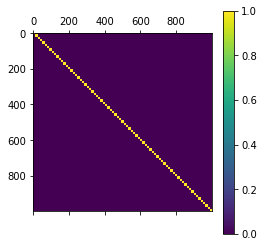

In [8]:
plt.matshow(cover)
plt.colorbar()
plt.show()

### Pairwise distances between shape DNAs

In [7]:
#matrix storing all euclidean distances netween shape DNAs
shapeDNA_dists = np.zeros((1000, 1000))
for i in range(len(all_shapeDNA)):
    for j in range(len(all_shapeDNA)):
        shapeDNA_dists[i][j] = np.linalg.norm(all_shapeDNA[i]-all_shapeDNA[j])

print(shapeDNA_dists)

[[0.         0.28714351 0.63287413 ... 0.5859398  0.84350428 0.95168684]
 [0.28714351 0.         0.85993633 ... 0.36936742 0.58467878 0.69514724]
 [0.63287413 0.85993633 0.         ... 1.06069649 1.37257558 1.44624444]
 ...
 [0.5859398  0.36936742 1.06069649 ... 0.         0.41092951 0.40591388]
 [0.84350428 0.58467878 1.37257558 ... 0.41092951 0.         0.28582272]
 [0.95168684 0.69514724 1.44624444 ... 0.40591388 0.28582272 0.        ]]


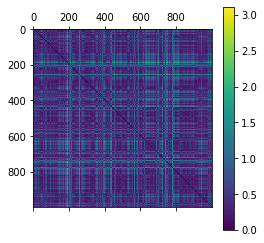

In [9]:
plt.matshow(shapeDNA_dists)
plt.colorbar()
plt.show()

In [25]:
#create distribution graphs
all_cover_dists = []
all_noncover_dists = []
for i in range(len(cover)):
    for j in range(len(cover)):
        if (cover[i][j] == 1):
            if (shapeDNA_dists[i][j] != 0): 
                all_cover_dists.append(shapeDNA_dists[i][j])
        else:
            all_noncover_dists.append(shapeDNA_dists[i][j])
print(len(all_cover_dists))
print(len(all_noncover_dists))

11980
987012


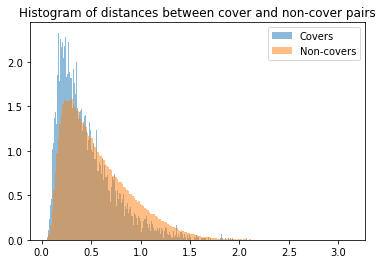

In [31]:
plt.figure()
plt.hist(all_cover_dists, bins=200, alpha=0.5, label='Covers', density=1)
plt.hist(all_noncover_dists, bins=200, alpha=0.5, label='Non-covers', density=1)
plt.title("Histogram of distances between cover and non-cover pairs")
plt.legend(loc='upper right')
plt.show()

### Calculate Hausdorff distances between all sets

In [34]:
#Need to flatten each matrix first
for i in range(len(all_distset)): #flattening the matrices
    for j in range(len(all_distset[i])):
        all_distset[i][j] = all_distset[i][j].flatten()
        
print(all_distset)

[[array([0.        , 0.00382501, 0.00062173, ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.00239909, 0.0095339 , ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.00235432, 0.00945622, ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.00235425, 0.00945609, ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.0023541 , 0.00945583, ..., 0.00104183, 0.00104183,
       0.        ]), array([0.        , 0.00235292, 0.00945369, ..., 0.00104183, 0.00104183,
       0.        ]), array([0.        , 0.00207861, 0.00883255, ..., 0.0010418 , 0.0010418 ,
       0.        ]), array([0.        , 0.00206718, 0.00880185, ..., 0.00104176, 0.00104176,
       0.        ])], [array([0.        , 0.00166272, 0.00084628, ..., 0.        , 0.        ,
       0.        ]), array([0.        , 0.0015567 , 0.00148678, ..., 0.01222898, 0.01222898,
       0.        ]), array([0.        , 0.00154567, 0.00273513, ..., 0.01046264, 0.0104

In [37]:
#matrix storing all directed hausdorff distances between sets
distset_dists = np.zeros((1000,1000))
for i in range(len(all_distset)):
    for j in range(len(all_distset)):
        distset_dists[i][j] = (directed_hausdorff(all_distset[i], all_distset[j]))[0]
    print(i, end=', ')

print(distset_dists)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

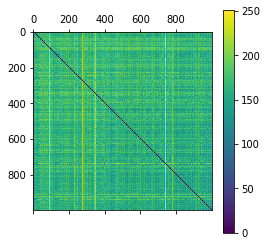

In [42]:
plt.matshow(distset_dists)
plt.colorbar()
plt.show()

In [38]:
#create distribution graphs
all_cover_setdists = []
all_noncover_setdists = []
for i in range(len(cover)):
    for j in range(len(cover)):
        if (cover[i][j] == 1):
            if (distset_dists[i][j] != 0): 
                all_cover_setdists.append(distset_dists[i][j])
        else:
            all_noncover_setdists.append(distset_dists[i][j])
print(len(all_cover_setdists))
print(len(all_noncover_setdists))

11980
987012


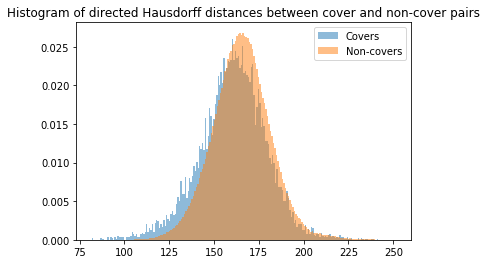

In [39]:
plt.figure()
plt.hist(all_cover_setdists, bins=200, alpha=0.5, label='Covers', density=1)
plt.hist(all_noncover_setdists, bins=200, alpha=0.5, label='Non-covers', density=1)
plt.title("Histogram of directed Hausdorff distances between cover and non-cover pairs")
plt.legend(loc='upper right')
plt.show()

### KS Score

In [41]:
from scipy.stats import ks_2samp
print(ks_2samp(all_cover_dists, all_noncover_dists))
print(ks_2samp(all_cover_setdists, all_noncover_setdists))

Ks_2sampResult(statistic=0.1381475897774993, pvalue=1.2370004898201855e-196)
Ks_2sampResult(statistic=0.10804880126995936, pvalue=1.8884355169619708e-120)
